# **Linear Regression on the E-commerce Dataset**

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Import Libraries and Download the Dataset**

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [4]:
os.listdir('/kaggle/input/focusing-on-mobile-app-or-website')
df = pd.read_csv('/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers')
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Basic Information Check**

In [5]:
df.shape
df.info()
df.isna().sum()
df.isnull().sum()
df.duplicated().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Statistical Description**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


**Out of curiosity, I attempted to conduct a state-wise comparison to check if its impacting their buying pattern**

In [7]:
std_state_code = ['AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
'MS','MO','MT','NB','NV','NH','NJ','NM','NY','NC','ND','OH',
'OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VT','VA',
'WA','WV','WI','WY']
lst_state = []
for i in range(0,len(df)):
    addr = df['Address'][i][-14:]
    func = filter(lambda char: char.isupper(), ''.join(addr))
    state = ''.join(func)
    if len(state) > 2:
        state = state[-2:]
    if state not in std_state_code:
        state = np.nan
    lst_state.append(state)
      
df['state'] = lst_state

In [8]:
df['state'].unique()
df['state'].value_counts()
df['state'].count()
df['state'].isnull().sum()
df['state'].isna().sum() # Given that it's a derived column, it's inevitable that non-valid values will arise.

108

**Applying Label Encoder to encode the states into numerical values.**

In [12]:
label = LabelEncoder()
df['state_encoded'] = label.fit_transform(df['state'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   state                 392 non-null    object 
 9   state_encoded         500 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


**Analyzing the purchasing trends across various states to identify the likelihood of increased buying behavior in specific regions**

In [ ]:
tot_spending_state_wise = df[df['state'].isna() == False].groupby('state_encoded')[y_col].sum()
s1 = pd.Series(data=tot_spending_state_wise.values,index=tot_spending_state_wise.index,name='tot_spending_state_wise')
cnt_states = df.groupby('state')['state'].count()
s2 = pd.Series(data=cnt_states.index,index=range(0,len(cnt_states)),name='state')
s3 = pd.Series(data=cnt_states.values,index=range(0,len(cnt_states)),name='state_count')
probability = pd.Series(data = (tot_spending_state_wise.values / tot_spending_state_wise.sum()) * 100,index=range(0,len(cnt_states))
                         ,name='probability')
df_state_prob = pd.concat( [s2,s3,s1,probability],axis=1)
df_state_prob = df_state_prob[df_state_prob['probability'] > 2] #Simplifying the analysis by focusing on states where the probability of buying exceeds 2% 
plt.figure(figsize=(8,5))
plt.xlabel('States in US')
plt.ylabel('Probability % of Amount Spent')
plt.scatter(x=df_state_prob['state'],y=df_state_prob['probability'])
plt.show()

**Correlation Map**

> Upon analyzing the patterns, it appears that only three features qualify: the Length of Membership shows a strong correlation, while the Avg. Session Length and Time on App exhibit weaker correlations.

<Axes: >

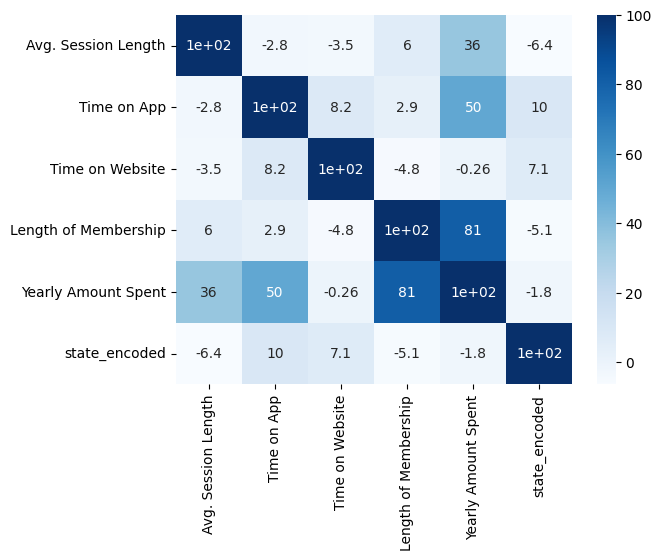

In [13]:
numeric_cols = [col for col in df.columns if (df[col]).dtype != 'object']
y_col = 'Yearly Amount Spent'
corr_col = df[numeric_cols].corr()*100
sns.heatmap(data=corr_col,annot=True,cmap='Blues')

**Utilizing box plots to identify and examine outliers in the dataset**
> Outliers have been detected within the features

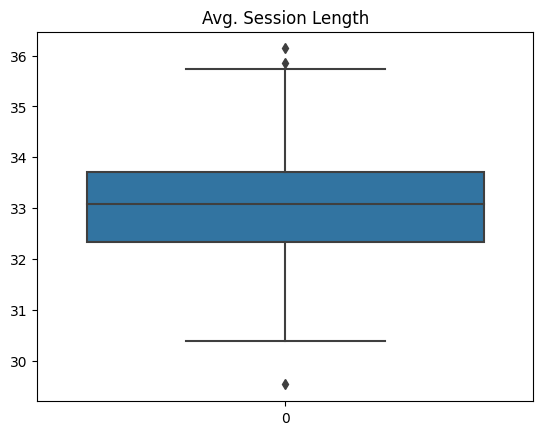

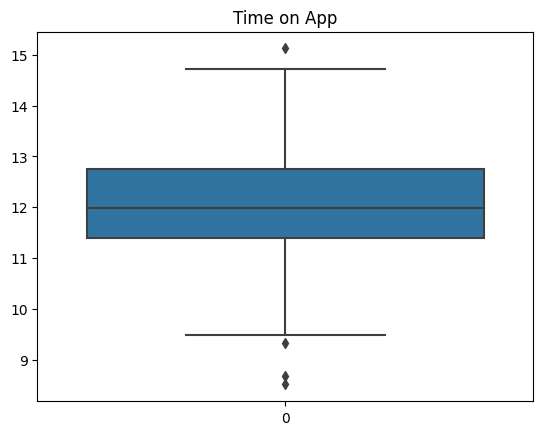

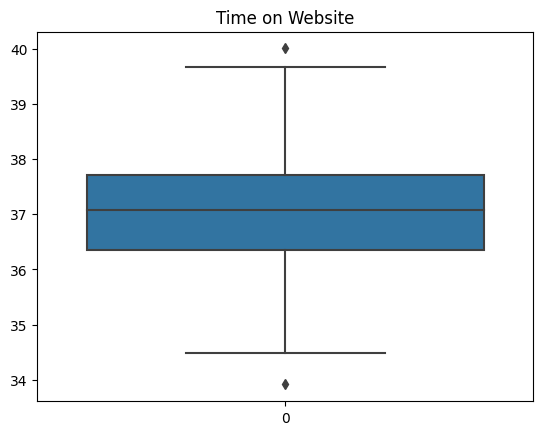

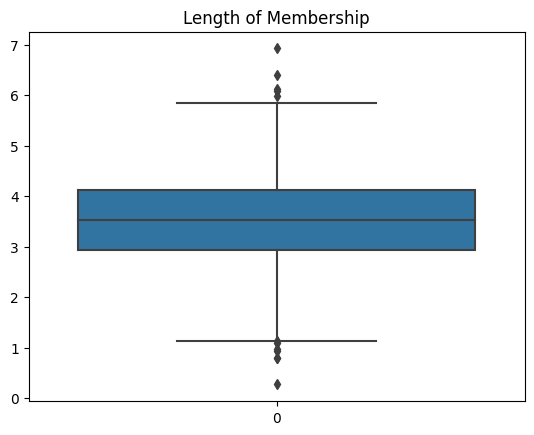

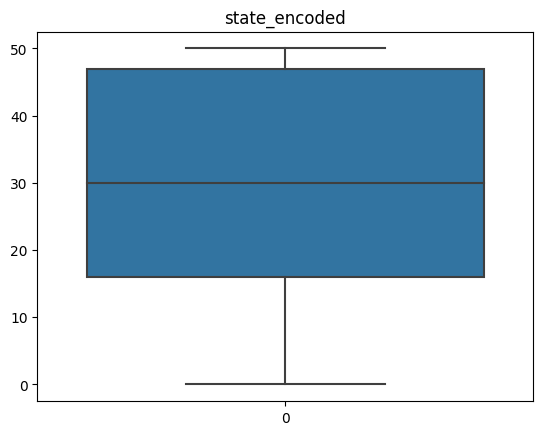

In [14]:
for col in numeric_cols:
    if col != 'Yearly Amount Spent':       
        sns.boxplot(df[col])        
        plt.title(f"{col}")
        plt.show()

In [15]:
for col in numeric_cols:
    if col not in ['Yearly Amount Spent','state_encoded']:   
        q1,q3 = np.percentile(df[col],[25,75])
        iqr = q3-q1
        lf =  q1 - 1.5*iqr
        uf =  q3 + 1.5*iqr
        print(f"The lower fence {lf} and upper fence{uf} for {col}")
        df = df[(df[col]>=lf) & (df[col]<=uf)] # DataFrame filtered to exclude outliers 

The lower fence 30.28657747536273 and upper fence35.767229553109516 for Avg. Session Length
The lower fence 9.332778078459471 and upper fence14.815003518943657 for Time on App
The lower fence 34.297706257038925 and upper fence39.77716362328482 for Time on Website
The lower fence 1.1428667219770978 and upper fence5.918151207893688 for Length of Membership


**Recreating the box plot to verify that outliers have been successfully removed from the dataset.**

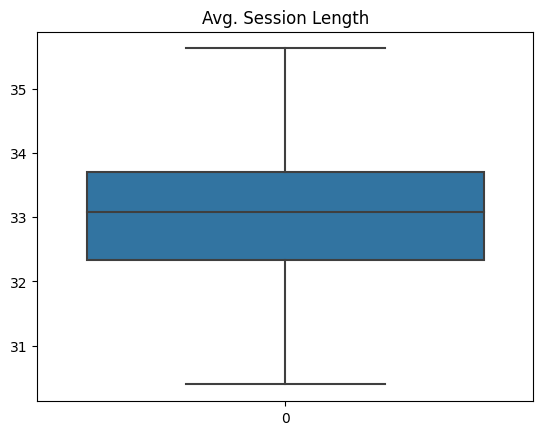

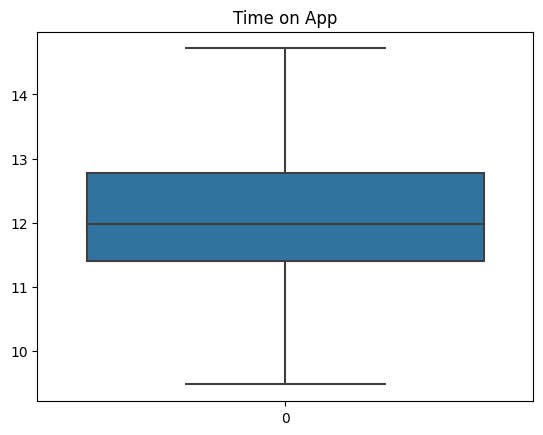

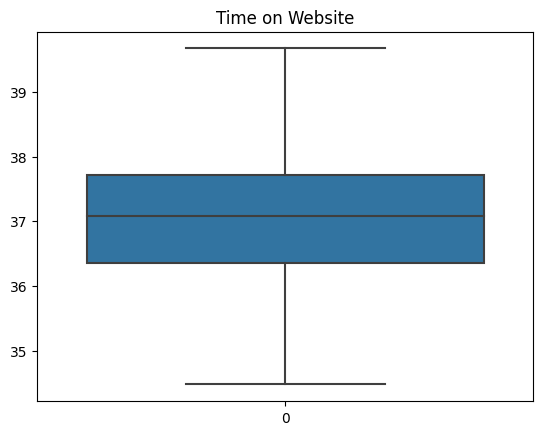

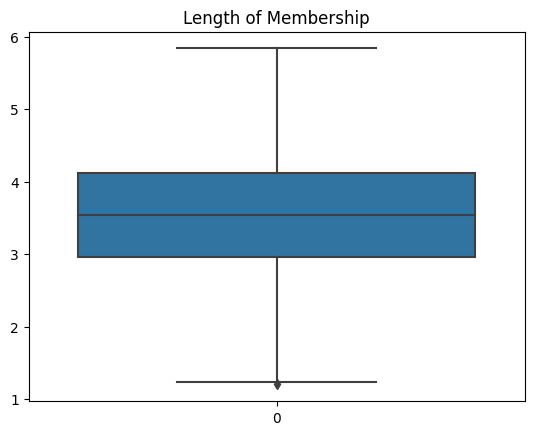

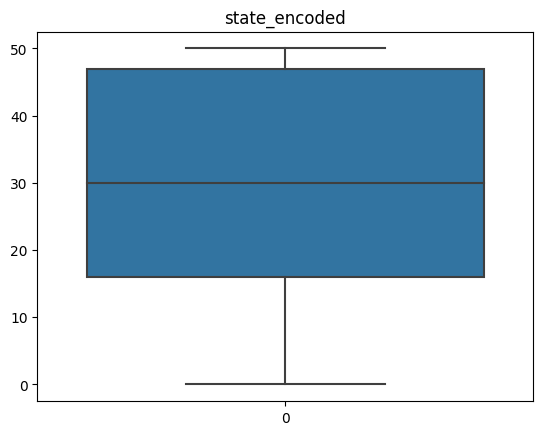

In [17]:
for col in numeric_cols:
    if col != 'Yearly Amount Spent':       
        sns.boxplot(df[col])        
        plt.title(f"{col}")
        plt.show()

**Visualizing the correlation using scatter plots**
>As mentioned, only the Length of Membership feature exhibits a strong correlation

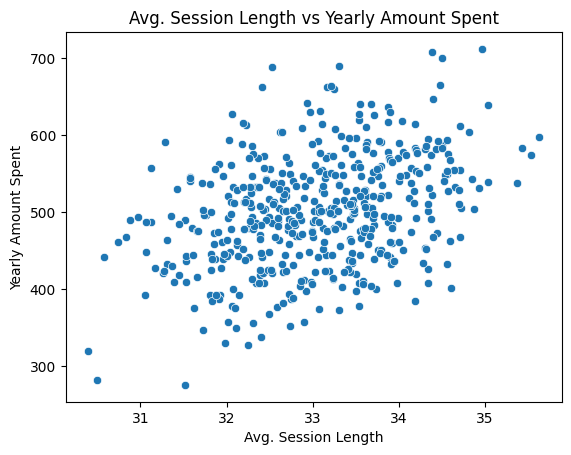

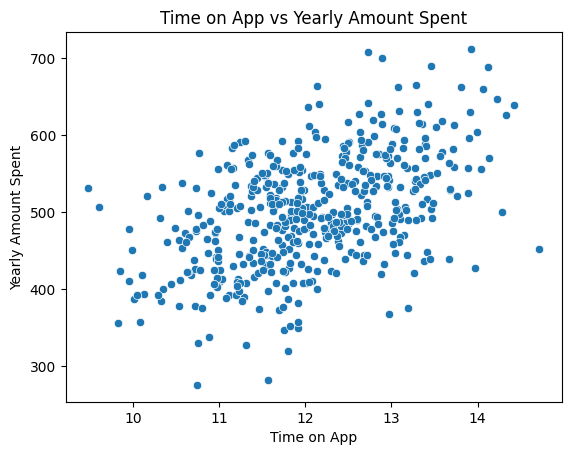

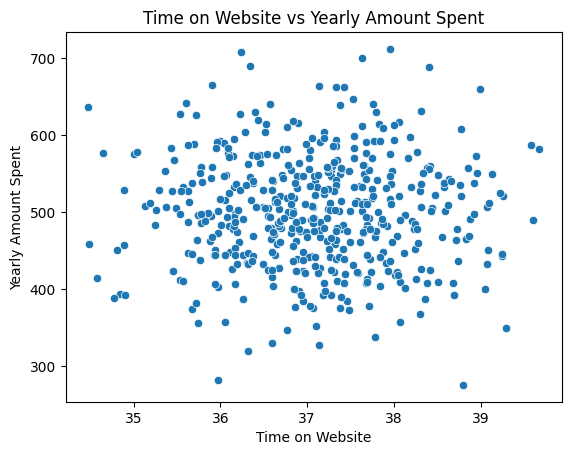

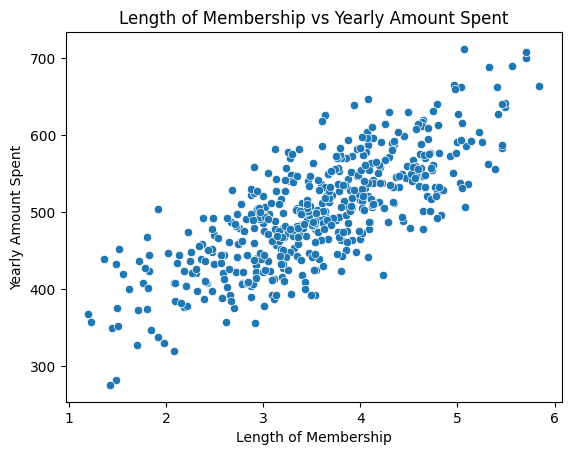

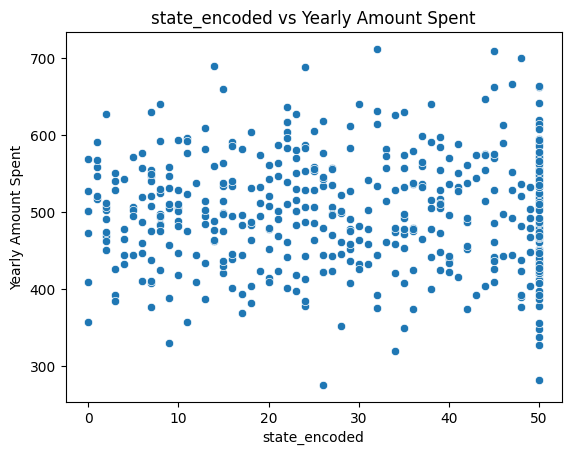

In [18]:
for col in numeric_cols:
    if col not in ['Yearly Amount Spent']:   
        sns.scatterplot(x=df[col],y=df[y_col])
        plt.xlabel(col)
        plt.ylabel('Yearly Amount Spent')
        plt.title(f"{col} vs {y_col}")
        plt.show()

**Creating histograms to visualize the distribution of data.**
> All features exhibit a normal distribution, as evidenced by the presence of a perfect bell curve in the histograms.

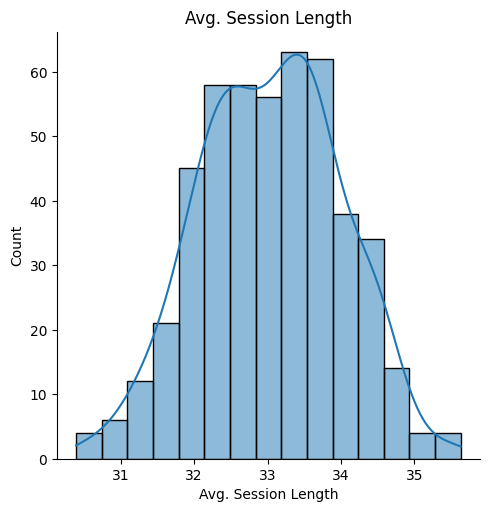

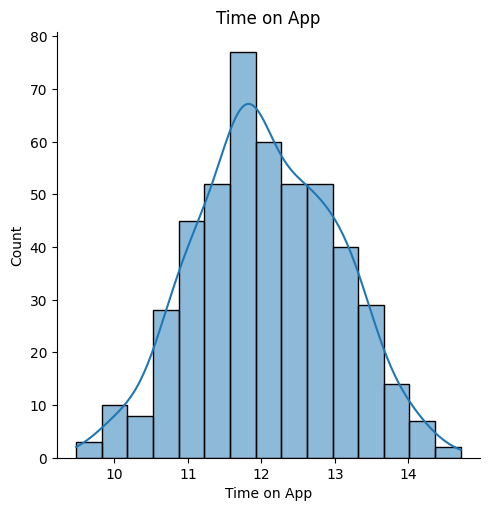

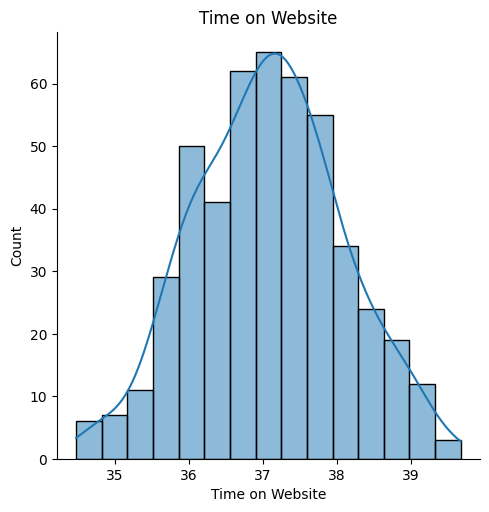

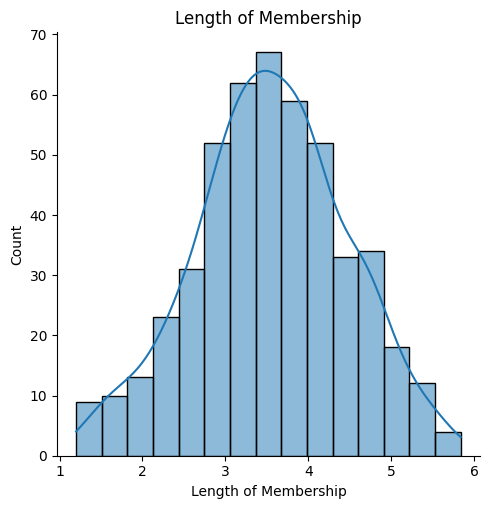

In [20]:
for col in numeric_cols:
    if col not in ['Yearly Amount Spent','state_encoded']:       
        sns.displot(x=df[col],bins=15,kde=True)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f"{col}")
        plt.show()

**Examining the individual feature correlation with the target variable.**
> The features Length of Membership, Avg. Session Length, and Time on App display a positive linear relationship with the target variable

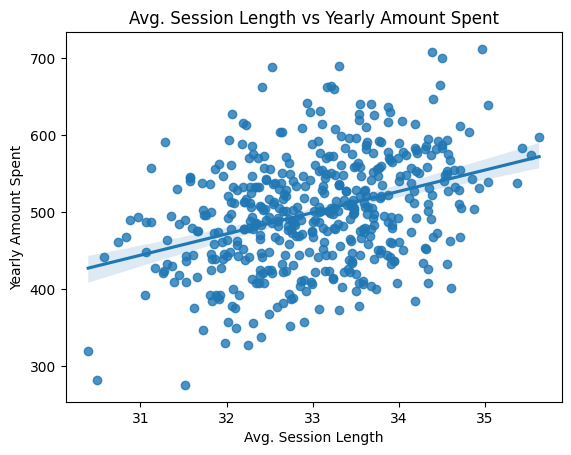

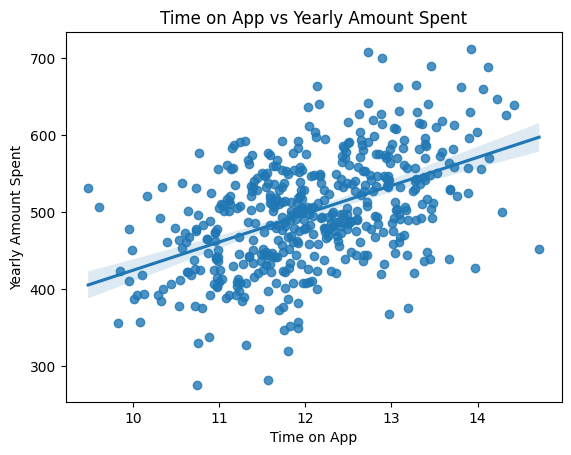

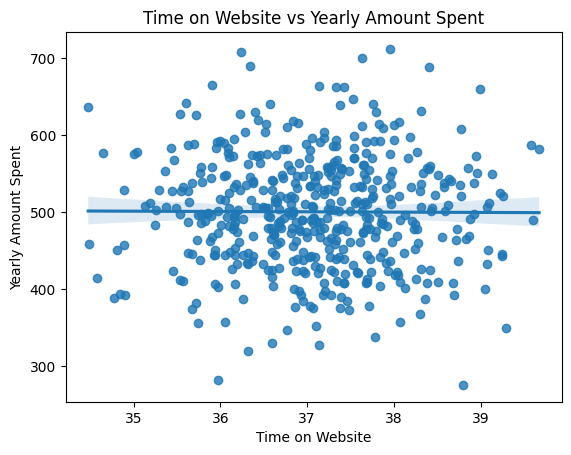

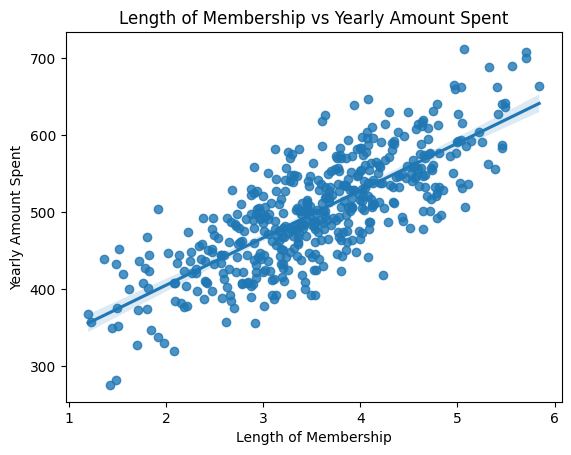

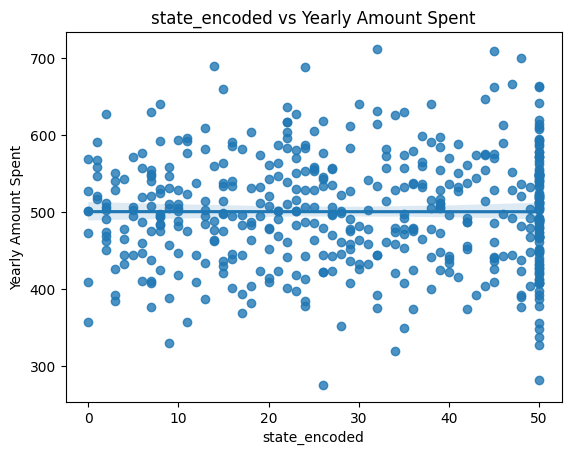

In [21]:
for col in numeric_cols:
    if col != 'Yearly Amount Spent':       
        sns.regplot(x=df[col],y=df[y_col])
        plt.xlabel(col)
        plt.ylabel('Yearly Amount Spent')
        plt.title(f"{col} vs {y_col}")
        plt.show()

**Scaling the dataset to ensure proper fitting for the machine learning model**

In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
df = pd.DataFrame(data=scaled_data,columns=numeric_cols)
numeric_cols
df.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_encoded
0,0.783571,0.606741,0.981731,0.621147,0.714888,0.42
1,0.292704,0.311532,0.537382,0.315419,0.266420,0.06
2,0.497880,0.353692,0.506902,0.625872,0.484856,0.12
3,0.746968,0.809479,0.431972,0.413725,0.700915,0.66
4,0.560839,0.633383,0.588904,0.699528,0.741132,0.74


**Since the distribution appears to be quite normal, there's no need for any conversion like sqrt , log or Inverse**

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

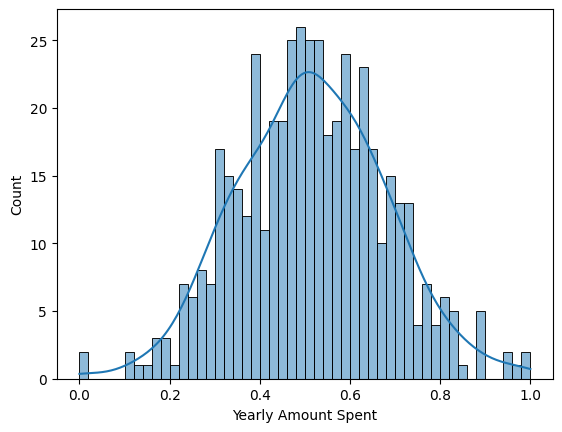

In [23]:
sns.histplot(data=df[numeric_cols],x=df[y_col],kde=True,bins=50)

**Create a Linear Regression Model**
> Features are selected based on their correlation with the target variable

In [25]:
X= df[['Avg. Session Length','Time on App', 'Length of Membership']] # Removing 'Time on Website'
y = df[y_col] # target Variable
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5) # Spliting train and testin data (80% & 20%)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train) # Pass the training data set to the model

LinearRegression()

In [26]:
y_pred = lr_model.predict(x_test) # Now predict using the test dataset
m =lr_model.coef_ # Model Slope value
yi =lr_model.intercept_ #Model y intercept value

In [27]:
lr_r2_score = r2_score(y_test,y_pred)
print('MSE :',mean_squared_error(y_test,y_pred))
print('Explained Variance r2_score :',lr_r2_score)
print('Unexplained Variance r2_score :',1 - lr_r2_score)
print(f"Slope: {m} and intercept {yi}")

MSE : 0.0005008329906070474
Explained Variance r2_score : 0.9809113841186096
Unexplained Variance r2_score : 0.019088615881390436
Slope: [0.31036121 0.46785199 0.65748292] and intercept -0.20607678230767357


**Visually inspecting the predicted and actual values.**
> It's evident that the model accurately predicts the spending percentage of consumers

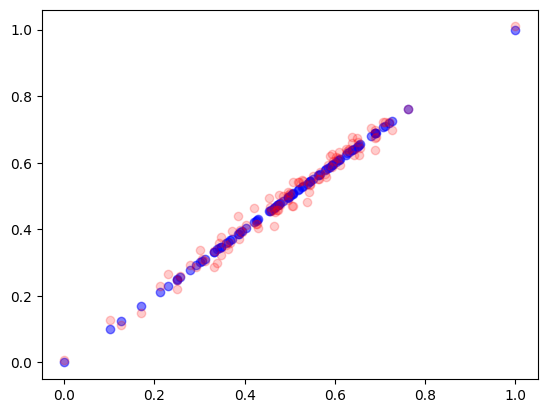

In [28]:
plt.scatter(x=y_test,y=y_test,c='blue',label='Actual',alpha=0.5)
plt.scatter(x=y_test,y=y_pred,c='red',label = 'Predicted',alpha=0.2)

**Performing cross-validation to assess the model's performance across different samples.**

In [29]:
X= df[['Avg. Session Length','Time on App', 'Length of Membership']] # Removing 'Time on Website'
y = df[y_col]
cross_score = cross_val_score(lr_model,X,y,cv=5)
cross_score

array([0.97800035, 0.97335845, 0.98572577, 0.98232708, 0.97840781])

**Model Score Interpretation**
1. > The model fit is excellent, indicated by an R-squared score of 98%
2. > Explained variance in the best fit Line (r2_score) : 
         1 - (Sum of Error Residual (SSE: actual y - predicted y) /  Sum of Variance from Mean (SST : actual y - Mean y) ) : 98%
3. > Alternate Method of finding r2 score : Sum of Variance from Mean (SSR: predicted y - Mean y) / Sum of Variance from Mean (SST) 
4. > Unexplained variance in the best fit Line:  (Sum of Error Residual (SSE: actual y - predicted y) /  Sum of Variance from Mean (SST : actual y - Mean y) ) : 2 %